## **Automated Diagnosis of Diabetic Retinopathy**

### **Background**
Diabetic Retinopathy (DR) is a serious complication of diabetes that damages the retina, potentially leading to vision loss. With the rising prevalence of diabetes, DR has become a significant public health concern. Early detection and timely intervention are vital for preventing severe vision impairment and improving patient outcomes. However, the current methods of diagnosing DR through manual interpretation of retinal images are labor-intensive and prone to human error, making them inefficient and inconsistent.

### **Objective**
The goal is to develop an automated and accurate tool for diagnosing Diabetic Retinopathy using retinal images. This tool should assist healthcare professionals by providing consistent and reliable grading of DR severity, thus facilitating early intervention and personalized treatment plans.

### Dataset Description
The dataset comprises a large collection of high-resolution retinal images captured under various imaging conditions. Each image has been assessed by a medical professional, who determined the presence of Diabetic Retinopathy and assigned a binary rating:
- 0: No Diabetic Retinopathy
- 1: Diabetic Retinopathy

### **Challenges**
1. **Subjectivity and Manual Labor:** Current methods rely on subjective assessments, which can lead to inconsistencies and inefficiencies.
2. **Increasing Prevalence:** The rising number of diabetes cases and the limited availability of ophthalmologists exacerbate the need for timely and accurate screening.
3. **Imaging Variability:** The dataset includes images captured under different conditions, which may affect the consistency of the automated diagnosis.

### **Solution**
To address these challenges, an automated system utilizing advanced machine learning techniques will be developed. This system aims to:
- Accurately detect and grade Diabetic Retinopathy from retinal images.
- Provide consistent and reliable results, reducing the dependence on subjective human interpretation.
- Enable early detection and intervention, improving patient outcomes.

### **Impact**
Implementing an automated DR diagnosis system will streamline the screening process, reduce the workload on healthcare professionals, and ensure timely and accurate diagnosis. This will ultimately lead to better management of Diabetic Retinopathy and improved vision health for patients with diabetes.

In [ ]:
# importing libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras import optimizers
# from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data loading
path = "/content/drive/MyDrive/Blossom_fellowship(Data_Science)/Diabetic_retinopathy/RETINOPATHY/Diabetic_Retinopathy/train/"
all_classes = os.listdir(path)

print(all_classes)

['DR', 'No_DR']


In [ ]:
# Load images and labels

def load_data(data_path):
    images = []
    labels = []
    for label, category in enumerate(all_classes):
        category_path = Path(data_path) / category
        for image_path in category_path.glob('*.jpg'):
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


In [ ]:
X, y = load_data(path)
print(f'Total images: {len(X)}, Total labels: {len(y)}')

Total images: 2076, Total labels: 2076


In [ ]:
# split data into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print("Original X_train shape:", X_train.shape)
print("Original X_test shape:", X_test.shape)

Original X_train shape: (1868, 224, 224, 3)
Original X_test shape: (208, 224, 224, 3)


In [ ]:
# normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

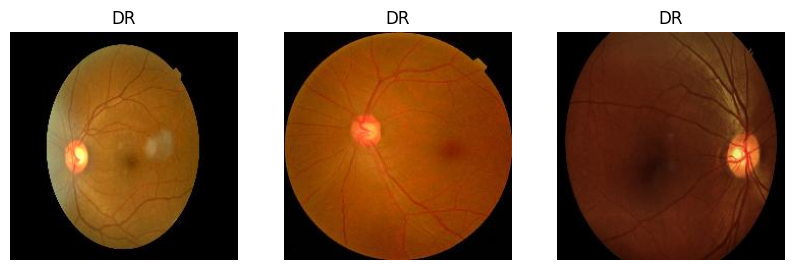

In [ ]:
# Identify the class label for DR
DR_label = 1

# Filter images belonging to the DR class
DR_indices = np.where(y_train == DR_label)[0]

plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[DR_indices[i]])
  plt.title("DR")
  plt.axis("off")

plt.show()


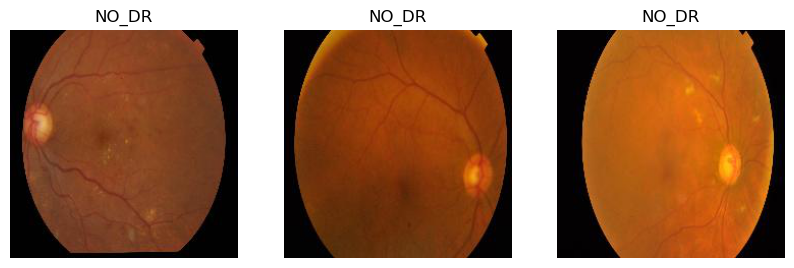

In [ ]:
# Identify the class label for NO_DR
NO_DR_label = 0

# Filter images belonging to the NO_DR class
NO_DR_indices = np.where(y_train == NO_DR_label)[0]


plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[NO_DR_indices[i]])
  plt.title("NO_DR")
  plt.axis("off")
plt.show()


### **First Model Architechture**

In [ ]:
model1 = models.Sequential([
    # input layer
    layers.Input(shape=(224, 224, 3)),

    # hidden layers
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),

    # output layer
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# compile the model
model1.compile(optimizer='adam',
                loss="binary_crossentropy",
                metrics=['accuracy'])

In [ ]:
# Train the model
train2 = model1.fit(X_train, y_train, epochs=12,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/12
59/59 [==============================] - 819s 14s/step - loss: 0.3706 - accuracy: 0.8116 - val_loss: 0.1659 - val_accuracy: 0.9327
Epoch 2/12
59/59 [==============================] - 826s 14s/step - loss: 0.2223 - accuracy: 0.9170 - val_loss: 0.1744 - val_accuracy: 0.9423
Epoch 3/12
59/59 [==============================] - 817s 14s/step - loss: 0.2093 - accuracy: 0.9283 - val_loss: 0.1401 - val_accuracy: 0.9471
Epoch 4/12
59/59 [==============================] - 816s 14s/step - loss: 0.1901 - accuracy: 0.9283 - val_loss: 0.1256 - val_accuracy: 0.9567
Epoch 5/12
59/59 [==============================] - 816s 14s/step - loss: 0.1873 - accuracy: 0.9358 - val_loss: 0.1180 - val_accuracy: 0.9567
Epoch 6/12
59/59 [==============================] - 816s 14s/step - loss: 0.1884 - accuracy: 0.9315 - val_loss: 0.1159 - val_accuracy: 0.9712
Epoch 7/12
59/59 [==============================] - 846s 14s/step - loss: 0.1741 - accuracy: 0.9411 - val_loss: 0.1322 - val_accuracy: 0.9519
Epoch 

In [ ]:
# Evaluate the model
train_loss, training_accuracy = model1.evaluate(X_train, y_train, verbose=2)
test_loss, testing_accuracy = model1.evaluate(X_test, y_test, verbose=2)


print(f'Train accuracy: {training_accuracy}')
print(f'Test accuracy: {testing_accuracy}')

59/59 - 235s - loss: 0.1241 - accuracy: 0.9625 - 235s/epoch - 4s/step
7/7 - 24s - loss: 0.1441 - accuracy: 0.9375 - 24s/epoch - 3s/step
Train accuracy: 0.9625267386436462
Test accuracy: 0.9375


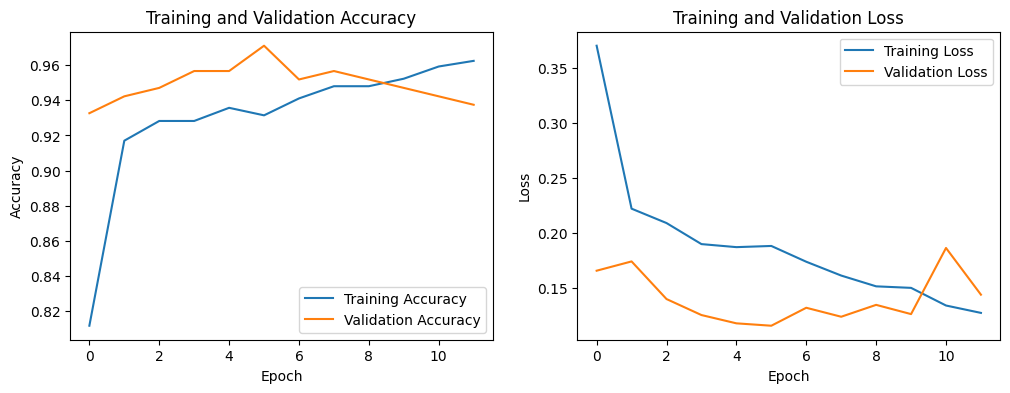

In [ ]:
# plotting the results:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train2.history['accuracy'], label='Training Accuracy')
plt.plot(train2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train2.history['loss'], label='Training Loss')
plt.plot(train2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# ===========================================================================================

### **Second Architechture**
Efforts to improve accuracy

In [ ]:
model2 = models.Sequential([
    # input layer
    layers.Input(shape=(224, 224, 3)),

    # hidden layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # flatten the output
    layers.Flatten(),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    # layers.Flatten(),

    # output layer
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


# compile the model
model2.compile(optimizer='adam',
                loss="binary_crossentropy",
                metrics=['accuracy'])

# summary of model
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 54, 54, 64)       

In [ ]:
# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history2 = model2.fit(X_train, y_train, epochs=12,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/12
59/59 [==============================] - 261s 4s/step - loss: 0.5127 - accuracy: 0.7243 - val_loss: 0.2055 - val_accuracy: 0.9231
Epoch 2/12
59/59 [==============================] - 251s 4s/step - loss: 0.2464 - accuracy: 0.9004 - val_loss: 0.1394 - val_accuracy: 0.9615
Epoch 3/12
59/59 [==============================] - 254s 4s/step - loss: 0.2119 - accuracy: 0.9256 - val_loss: 0.1174 - val_accuracy: 0.9663
Epoch 4/12
59/59 [==============================] - 253s 4s/step - loss: 0.2009 - accuracy: 0.9315 - val_loss: 0.1266 - val_accuracy: 0.9615
Epoch 5/12
59/59 [==============================] - 250s 4s/step - loss: 0.1912 - accuracy: 0.9363 - val_loss: 0.1054 - val_accuracy: 0.9663
Epoch 6/12
59/59 [==============================] - 250s 4s/step - loss: 0.1891 - accuracy: 0.9374 - val_loss: 0.1127 - val_accuracy: 0.9471
Epoch 7/12
59/59 [==============================] - 255s 4s/step - loss: 0.1831 - accuracy: 0.9411 - val_loss: 0.1550 - val_accuracy: 0.9663
Epoch 8/12
59

In [ ]:
# evaluate the model
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

# print the result
print(f'Test accuracy: {test_accuracy}')

7/7 [==============================] - 9s 1s/step - loss: 0.1054 - accuracy: 0.9663
Test accuracy: 0.9663461446762085


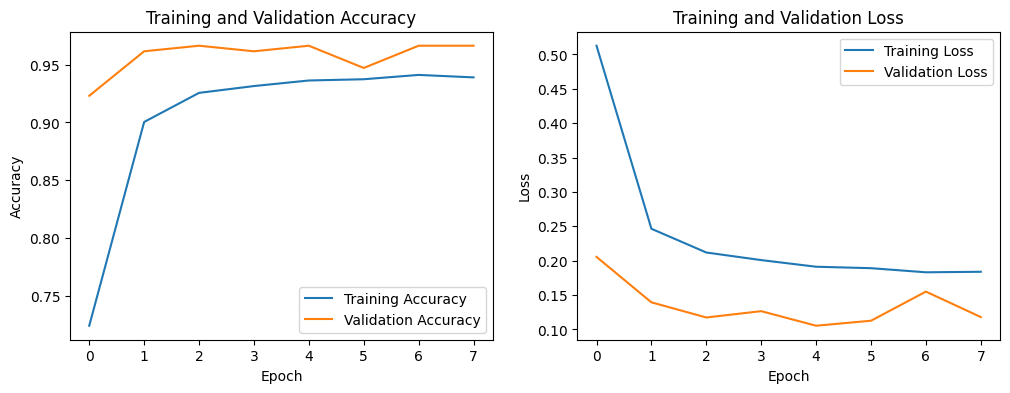

In [ ]:
# plotting the results:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Handling overfitting for Model2**

- decrease number of layers
- reduce number of units in each layer

In [ ]:
model2_new = models.Sequential([
    # input layer
    layers.Input(shape=(224, 224, 3)),

    # hidden layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Dropout(0.25),

    # flatten the output
    layers.Flatten(),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    # layers.Flatten(),

    # output layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


# compile the model
model2_new.compile(optimizer='adam',
                loss="binary_crossentropy",
                metrics=['accuracy'])

# summary of model
model2_new.summary()

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history2_new = model2_new.fit(X_train, y_train, epochs=12,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# evaluate the model
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

# print the result
print(f'Test accuracy: {test_accuracy}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 54, 54, 64)       

## **Remarks**
After compilation and training, model2 turns out to have the highest test accuracy of  **$0.966$**

However, in this case of diabetic retinopathy, we cannot leave our accuracy at **$0.966$**. Further afforts are needed to improve the model accuracy to a more acceptable level in health/medicine!

- Model layers must also be reviewed to resolve issues of overfitting.